# Lesson - Machine Learning X: Overfitting

While exploring regression, we've briefly come across overfitting and the problems it can cause. In this lesson, we'll explore how to identify overfitting and what you can do to avoid it. To explore overfitting, we'll use a dataset on cars which contains 7 numerical features that could have an effect on a car's fuel efficiency:

`cylinders` -- the number of cylinders in the engine.
`displacement` -- the displacement of the engine.
`horsepower` -- the horsepower of the engine.
`weight` -- the weight of the car.
`acceleration` -- the acceleration of the car.
`model year` -- the year that car model was released (e.g. 70 corresponds to 1970).
`origin` -- where the car was manufactured (0 if North America, 1 if Europe, 2 if Asia).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

### Bias and Variance

At the heart of understanding overfitting is understanding bias and variance. Bias and variance make up the 2 observable sources of error in a model that we can indirectly control.

Bias describes error that results in bad assumptions about the learning algorithm. For example, assuming that only one feature, like a car's weight, relates to a car's fuel efficiency will lead you to fit a simple, univariate regression model that will result in high bias. The error rate will be high since a car's fuel efficiency is affected by many other factors besides just its weight.

Variance describes error that occurs because of the variability of a model's predicted values. If we were given a dataset with 1000 features on each car and used every single feature to train an incredibly complicated multivariate regression model, we will have low bias but high variance.

In an ideal world, we want low bias and low variance but in reality, there's always a tradeoff.

### Bias-Variance Tradeoff

Overfitting generally happens when a model performs well on a training set but doesn't generalize well to new data. A key nuance here is that we should think of overfitting as a relative term. Between any 2 models, one will overfit more than the other one. Understanding the [bias variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) is critical to understanding overfitting. Every process has some amount of inherent noise that's unobservable. Overfit models tend to capture the noise as well as the signal in a dataset.
Scott Fortman Roe's [blog post on the bias-variance tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html) has a wonderful image that describes this tradeoff:

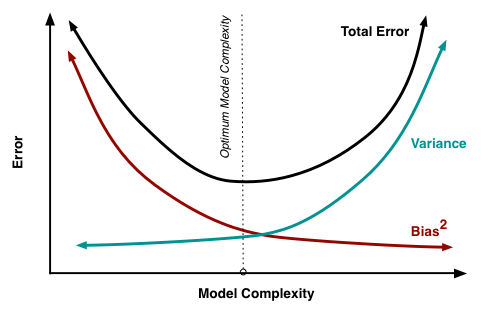

We can approximate the bias of a model by training a few different models from the same class (linear regression in this case) using different features on the same dataset and calculating their error scores. For regression, we can use mean absolute error, mean squared error, or R-squared.

We can calculate the variance of the predicted values for each model we train and we'll observe an increase in variance as we build more complex, multivariate models.

While an extremely simple, univariate linear regression model will underfit, an extremely complicated, multivariate linear regression model will overfit. Depending on the problem we're working on, there's a happy middle ground that will help us construct reliable and useful predictive models.

**Exercise**

- Create a function named `train_and_test` that:

- Takes in a list of column names in `filtered_cars` as the sole parameter (cols),
- Trains a linear regression model using:
 - The columns in cols as the features,
 - The `mpg` column as the target variable.
 - Uses the trained model to make predictions using the same input it was trained on,
 - Computes the variance of the predicted values and the mean squared error between the predicted values and the actual label (`mpg` column).
 - Returns the mean squared error value followed by the variance (e.g. return(mse, variance)).
- Use the `train_and_test` function to train a model using only the cylinders column. Assign the resulting mean squared error value and variance to `cyl_mse` and `cyl_var`.

- Use the `train_and_test` function to train a model using only the `weight` column. Assign the resulting mean squared error value and variance to `weight_mse` and `weight_var`.

In [3]:
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)
    
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])

### Multivariate Models
Now that we have a function for training a regression model and calculating the mean squared error and variance, let's use it to train and understand more complex models.

**Exercise**

Use the train_and_test function to train linear regression models using the following columns as the features:

columns: `cylinders`, `displacement`.
MSE: `two_mse`, variance: `two_var`.
columns: `cylinders`, `displacement`, `horsepower`.
MSE: `three_mse`, variance: `three_var`.
columns: `cylinders`, `displacement`, `horsepower`, `weight`.
MSE: `four_mse`, variance: `four_var`.
columns: `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`.
MSE: `five_mse`, variance: `five_var`.
columns: `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model year`
MSE: `six_mse`, variance: `six_var`.
columns: `cylinders`, `displacement`, `horsepower`, `weight`, `acceleration`, `model year`, `origin`
MSE: `seven_mse`, variance: `seven_var`.
Use `print` statements to display each value.

In [4]:
one_mse, one_var = train_and_test(["cylinders"])
two_mse, two_var = train_and_test(["cylinders", "displacement"])
three_mse, three_var = train_and_test(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_test(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_test(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [5]:
print(one_mse, one_var)
print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

24.02017956815553 36.74255887416017
21.282057055586364 39.480681386729316
20.25295483971423 40.50978360260148
17.76386057184385 42.998877870471865
17.76139610540622 43.001342336909396
11.590170981415227 49.172567460900346
10.847480945000454 49.915257497315146


### Cross Validation
The multivariate regression models we trained got progressively better at reducing the amount of error.

A good way to detect if our model is overfitting is to compare the in-sample error and the out-of-sample error, or the training error with the test error. So far, we calculated the in sample error by testing the model over the same data it was trained on. To calculate the out-of-sample error, we need to test the data on a test set of data. We unfortunately don't have a separate test dataset and we'll instead use cross validation.

If a model's cross validation error (out-of-sample error) is much higher than the in sample error, then it is a clear indicator that the trained model doesn't generalize well outside of the training set.

**Exercise**
Create a function named train_and_cross_val that:

- takes in a single parameter (list of column names),
- trains a linear regression model using the features specified in the parameter,
- uses the KFold class to perform 10-fold validation using a random seed of 3 ,
- calculates the mean squared error across all folds and the mean variance across all folds.
- returns the mean squared error value then the variance using a multiple return statement (e.g. return(avg_mse, avg_var)).

Use the train_and_cross_val function to train linear regression models using the following columns as the features:

- the cylinders and displacement columns. Assign the resulting mean squared error value to two_mse and the resulting variance value to two_var.
- the cylinders, displacement, and horsepower columns. Assign the resulting mean squared error value to three_mse and the resulting variance value to three_var.
- the cylinders, displacement, horsepower, and weight columns. Assign the resulting mean squared error value to four_mse and the resulting variance value to four_var.
- the cylinders, displacement, horsepower, weight, acceleration columns. Assign the resulting mean squared error value to five_mse and the resulting variance value to five_var.
- the cylinders, displacement, horsepower, weight, acceleration, and model year columns. Assign the resulting mean squared error value to six_mse and the resulting variance value to six_var.
- the cylinders, displacement, horsepower, weight, acceleration, model year, and origin columns. Assign the resulting mean squared error value to seven_mse and the resulting variance value to seven_var.
Use the variable display to inspect each value.

In [6]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf.split(features):
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
        


In [7]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

In [8]:
print(one_mse, one_var)
print(two_mse, two_var)
print(three_mse, three_var)
print(four_mse, four_var)
print(five_mse, five_var)
print(six_mse, six_var)
print(seven_mse, seven_var)

24.02017956815553 36.74255887416017
21.584370274954374 38.90252531375602
20.655622193882955 40.09128795660694
18.169683239081884 42.507643643644386
18.283038517172052 42.59873630014678
12.099685425467118 48.92824696771803
11.418131971812054 49.90431373098729


### Plotting Cross Validation Error versus Variance
During cross validation, the more features we added to the model, the lower the mean squared error got. This is a good sign and indicates that the model generalizes well to new data it wasn't trained on. As the mean squared error value went down, however, the variance of the predictions went up. This is to be expected, since the models with lower squared error values had higher model complexity, which tends to be more sensitive to small variations in input values (or high variance).

**Exercise**

On the same Axes instance:

- Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation mean squared error on the y-axis. Use red for the scatter dot color.
- Generate a scatter plot with the model's number of features on the x-axis and the model's overall, cross-validation variance on the y-axis. Use blue for the scatter dot color.
- Use `plt.show()` to display the scatter plot.

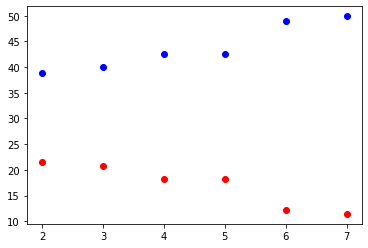

In [9]:
two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])
plt.scatter([2,3,4,5,6,7], [two_mse, three_mse, four_mse, five_mse, six_mse, seven_mse], c='red')
plt.scatter([2,3,4,5,6,7], [two_var, three_var, four_var, five_var, six_var, seven_var], c='blue')
plt.show()

### Conclusion

While the higher order multivariate models overfit in relation to the lower order multivariate models, the in-sample error and out-of-sample didn't deviate by much. The best model was around 50% more accurate than the simplest model. On the other hand, the overall variance increased around 25% as we increased the model complexity. This is a really good starting point, but our work is not done! The increased variance with the increased model complexity means that our model will have more unpredictable performance on truly new, unseen data.

If we were working on this problem on a data science team, we'd need to confirm the predictive accuracy of the model using completely new, unobserved data (e.g. maybe from cars from later years). Since often we can't wait until a model is deployed in the wild to know how well it works, the exploration we did in this mission helps us approximate a model's real world performance.